Karen Fukuda 

Updated 12.10.2023

This code is for plotting the CoM vs time. It is useful for investigating the effect of a certain halide, while other variables are held constant. 

This code is helpful for dealing with data sets that have a separate file for each PL frame. For example, the (wavelength, intensity) data points taken for one frame(~400-900nm) is in one file. A typical data set will contain multiple of these csv files. For example, a full data set for a 10 minute PL performed on one composition will contain 20 csv or txt files (integration time 1000ms, 30s in between each measurement). 


### Plots CoM (Cl effect: Br is held constant, Cl changes)

An example graph is shown below:

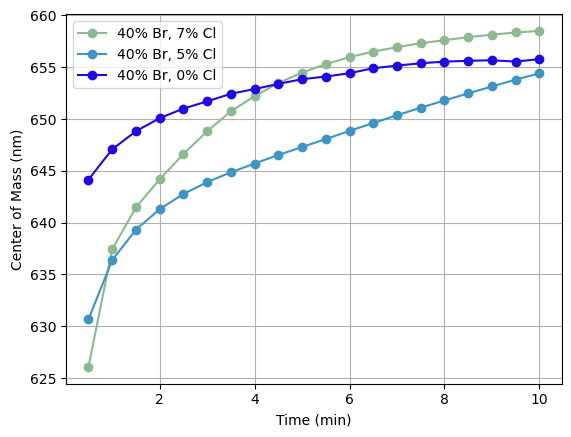

In [ ]:
#Plots one curve for each composition, tracking it's CoM over the PL time

import os
import re
import numpy as np
import matplotlib.pyplot as plt


def extract_cl_content(subfolder_name):
    #This function extracts Cl content from each folder 
    match = re.search(r'(\d+% Cl)', subfolder_name)
    if match:
        cl_content = int(match.group(1).split('%')[0])
        return cl_content
    return 0

def extract_timestamp(file_name):
    # Check if the file name matches the expected pattern
    if file_name.endswith(".txt") and len(file_name) >= 16:
        try:
            # Extract the last 3 characters and convert them to an integer
            last_3_digits = int(file_name[-7:-4])
            # Calculate the timestamp
            return last_3_digits / 2 + 0.5
        except ValueError:
            pass
    # Handle files that don't match the expected pattern
    return None  # or raise an exception if necessary

def process_file(file_path):
    intensity_wavelength = 0.0 #Initiatie two variables for calculating CoM
    total_intensity = 0.0

    with open(file_path, 'r') as text_file:
        lines = text_file.readlines()

        for line in lines:
            columns = line.strip().split('\t')
            if len(columns) >= 2:
                wavelength = float(columns[0])  # Assuming wavelength is in the first column
                intensity = float(columns[1])   # Assuming intensity is in the second column
                if wavelength >= 550 and wavelength <= 750:
                    intensity_wavelength += intensity * wavelength
                    total_intensity += intensity
                #set wavelength range to read across (ie 550 - 750)

    center_of_mass = intensity_wavelength / total_intensity
    return center_of_mass
          

main_folder = "PATH"  
# Get a list of subfolders sorted by Cl content
subfolders = sorted(os.listdir(main_folder), key=extract_cl_content)

    
for subfolder in subfolders:
    #Loop through each item (subfolder) in the main folder (Cl effect - 35% Br)
    subfolder_path = os.path.join(main_folder, subfolder)

    if os.path.isdir(subfolder_path):
        #Check that the item is a folder
        #If it is, intiate a list to store the files of the folder in
        print("Name of Subfolder:",subfolder) #Print name of subfolder 
        data_files = []

        for file_name in os.listdir(subfolder_path):
            #Loop through each file in the subfolder
            if file_name.endswith(".txt"):
                file_path = os.path.join(subfolder_path, file_name)
                data_files.append(file_name) #Add file to the list of files

        # Sort data_files based on the last 3 digits of the file name (time order)
        data_files.sort(key=lambda x: int(x.split('_')[-1][:3]))

        x_values = [] #List containing all timevalues of data set
        y_values = [] #List containing all CoM of data set 

        for file_name in data_files:
            #Loop through each file in the subfolder in the order of the list
            file_path = os.path.join(subfolder_path, file_name) #Create file path
            timestamp = extract_timestamp(file_name) #Create timestamp 
            center_of_mass = process_file(file_path) #Use function to find CoM of dataset 

            x_values.append(timestamp)
            y_values.append(center_of_mass)

            # Print out each coordinate
            print(f"Time (min): {timestamp}, Center of Mass (nm): {center_of_mass}")

        # Create a unique color for this subfolder
        color = np.random.rand(3,)

        # Plot data from this subfolder
        #plt.scatter(x_values, y_values, label=subfolder, color=color)
        
        # Plot data from this subfolder with lines connecting the points
        #plt.plot(x_values, y_values, label=subfolder, color=color)
        
        # Plot data from this subfolder as both points and connected line
        plt.plot(x_values, y_values, label=subfolder, color=color, marker='o', linestyle='-',)


# Customize the plot
plt.xlabel("Time (min)")
plt.ylabel("Center of Mass (nm)")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



### Plots CoM (Br effect: Cl is held constant, Br changes)
Example graph shown below:

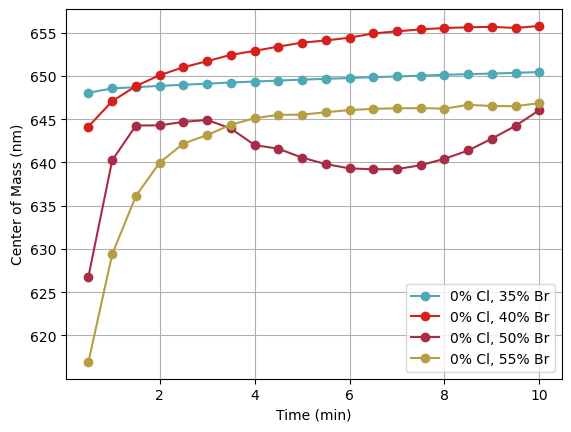

In [ ]:
#Plots one curve for each composition, tracking it's CoM over the PL time

import os
import re
import numpy as np
import matplotlib.pyplot as plt


def extract_br_content(subfolder_name):
    #This function extracts Cl content from each folder 
    match = re.search(r'(\d+% Br)', subfolder_name)
    if match:
        br_content = int(match.group(1).split('%')[0])
        return br_content
    return 0

def extract_timestamp(file_name):
    # Check if the file name matches the expected pattern
    if file_name.endswith(".txt") and len(file_name) >= 16:
        try:
            # Extract the last 3 characters and convert them to an integer
            last_3_digits = int(file_name[-7:-4])
            # Calculate the timestamp
            return last_3_digits / 2 + 0.5
        except ValueError:
            pass
    # Handle files that don't match the expected pattern
    return None  # or raise an exception if necessary

def process_file(file_path):
    intensity_wavelength = 0.0 #Initiatie two variables for calculating CoM
    total_intensity = 0.0

    with open(file_path, 'r') as text_file:
        lines = text_file.readlines()

        for line in lines:
            columns = line.strip().split('\t')
            if len(columns) >= 2:
                wavelength = float(columns[0])  # Assuming wavelength is in the first column
                intensity = float(columns[1])   # Assuming intensity is in the second column
                if wavelength >= 550 and wavelength <= 750:
                    intensity_wavelength += intensity * wavelength
                    total_intensity += intensity
                #set wavelength range to read across (ie 550 - 750)

    center_of_mass = intensity_wavelength / total_intensity
    return center_of_mass
          

main_folder = "/Users/Karen/Desktop/Plots for Solar/Br effect/Br effect - 5% Cl"  
# Get a list of subfolders sorted by Br content
subfolders = sorted(os.listdir(main_folder), key=extract_br_content)

    
for subfolder in subfolders:
    #Loop through each item (subfolder) in the main folder (Cl effect - 35% Br)
    subfolder_path = os.path.join(main_folder, subfolder)

    if os.path.isdir(subfolder_path):
        #Check that the item is a folder
        #If it is, intiate a list to store the files of the folder in
        print("Name of Subfolder:",subfolder) #Print name of subfolder 
        data_files = []

        for file_name in os.listdir(subfolder_path):
            #Loop through each file in the subfolder
            if file_name.endswith(".txt"):
                file_path = os.path.join(subfolder_path, file_name)
                data_files.append(file_name) #Add file to the list of files

        # Sort data_files based on the last 3 digits of the file name (time order)
        data_files.sort(key=lambda x: int(x.split('_')[-1][:3]))

        x_values = [] #List containing all timevalues of data set
        y_values = [] #List containing all CoM of data set 

        for file_name in data_files:
            #Loop through each file in the subfolder in the order of the list
            file_path = os.path.join(subfolder_path, file_name) #Create file path
            timestamp = extract_timestamp(file_name) #Create timestamp 
            center_of_mass = process_file(file_path) #Use function to find CoM of dataset 

            x_values.append(timestamp)
            y_values.append(center_of_mass)

            # Print out each coordinate
            print(f"Time (min): {timestamp}, Center of Mass (nm): {center_of_mass}")

        # Create a unique color for this subfolder
        color = np.random.rand(3,)

        # Plot data from this subfolder
        #plt.scatter(x_values, y_values, label=subfolder, color=color)
        
        # Plot data from this subfolder with lines connecting the points
        #plt.plot(x_values, y_values, label=subfolder, color=color)
        
        # Plot data from this subfolder as both points and connected line
        plt.plot(x_values, y_values, label=subfolder, color=color, marker='o', linestyle='-',)


# Customize the plot
plt.xlabel("Time (min)")
plt.ylabel("Center of Mass (nm)")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
